In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

In [7]:
data = pd.read_csv("churn_data.csv")

In [8]:
data.head()

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,NB_SMI_REQ,AMOUNT_SMI_REQ_EUR,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,ACCOUNTING_EXPORTS_GENERATED,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,AVG_SCORE,SUM_TICKETS,SUM_TICKETS_JIRA
0,viqa4cw1m8g0x3,2022-03-01,IT,2021-06-30,2022-03-01 16:50:43,NaN,False,True,Scale,Online,...,11.0,7722.11,1.0,83.00,NaN,9.0,NaN,NaN,1.0,NaN
1,vjoc1lr-0bupfj,2022-03-01,FR,2020-10-14,2021-12-31 09:06:06,NaN,False,NaN,Standard,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2,vm411wimib5e_x,2022-02-01,US,2021-12-16,2022-01-21 07:01:21,NaN,NaN,True,Standard,Online,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,vk9kmg_r0mf_0s,2022-02-01,MT,2020-10-12,2022-01-27 09:22:41,NaN,True,True,Essentials,Online + Expenses,...,NaN,NaN,0.0,0.00,0.0,46.0,22.0,NaN,NaN,NaN
4,vm3d8ydrpoed3e,2021-06-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,2.0,6447.27,26.0,825.09,NaN,1.0,10.0,NaN,2.0,NaN


In [9]:
data.shape

(109912, 53)

In [10]:
data.describe(include="all")

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,NB_SMI_REQ,AMOUNT_SMI_REQ_EUR,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,ACCOUNTING_EXPORTS_GENERATED,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,AVG_SCORE,SUM_TICKETS,SUM_TICKETS_JIRA
count,109912,109912,109912,109912,106765,20615,91794,59182,93008,99933,...,20730.000000,2.073000e+04,42526.000000,42526.000000,50191.000000,73867.000000,72571.000000,23249.000000,53357.000000,12704.000000
unique,6024,75,43,1389,5376,1403,2,1,7,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,E1jzxtOde,2022-03-01,FR,2019-09-10,2022-03-05 07:00:06,2022-01-25 09:50:31,False,True,Standard,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,75,4630,60336,289,214,66,71335,59182,37114,57767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.172793,2.148632e+05,20.068311,1662.424167,2.105358,39.672912,8.415841,8.388349,3.295969,1.788413
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.595433,1.575616e+06,77.712918,9211.000824,8.594524,87.246897,13.516806,2.145647,7.763508,1.506742
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.000000,2.000000,8.000000,1.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.000000,2.262361e+04,3.000000,149.070000,0.000000,14.000000,5.000000,9.000000,2.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.000000,1.337543e+05,15.000000,1022.417500,2.000000,43.000000,10.000000,10.000000,4.000000,2.000000


In [11]:
#checking missing values per column/variable 
print("Percentage of missing values: ")
missing_values = data.isnull().sum().sort_values(ascending=False)
100*missing_values/len(data)

Percentage of missing values: 


SUM_TICKETS_JIRA                       88.441662
CHURNING_DATE                          81.244086
NB_SMI_REQ                             81.139457
AMOUNT_SMI_REQ_EUR                     81.139457
AVG_SCORE                              78.847624
LAST_FUNDRAISING_AMOUNT                66.925358
NB_EXP_CL_REQ                          61.309047
AMOUNT_EXP_CL_REQ_EUR                  61.309047
NUMBER_EXPORT                          54.335286
ACCOUNTING_EXPORTS_GENERATED           54.335286
SUM_TICKETS                            51.454800
REQUESTER_LOGIN_PER_USER               49.037412
PAY_PER_LOAD                           48.103028
MAIN_ENTITY                            46.155106
AVERAGE_TIME_PER_USER_REQUESTER        43.396535
NON_REQUESTER_LOGIN_PER_USER           38.227855
SUB_SEGMENT                            38.112308
LOGIN_PER_USER                         37.702890
AVERAGE_TIME_PER_USER_NON_REQUESTER    35.496579
NUMBER_OF_TEAMS_ACTIVE                 33.973542
AMOUNT_PLASTIC_CARD_

In [12]:
features = list(data.columns)
print(features)

['ENTITY_ID', 'MONTH', 'COUNTRY', 'FIRST_LOAD_DATE', 'LAST_LOAD_DATE', 'CHURNING_DATE', 'IS_FLAGSHIP', 'MAIN_ENTITY', 'PLAN', 'BUNDLE', 'INDUSTRY', 'CS_OWNER', 'HEALTHSCORE', 'NPS', 'FTE_AGG', 'AGG_INDUSTRY', 'HIGH_LOW_TOUCH', 'LAST_FUNDRAISING_AMOUNT', 'AGE', 'SEGMENT', 'SUB_SEGMENT', 'NON_REQUESTER_LOGIN_PER_USER', 'REQUESTER_LOGIN_PER_USER', 'LOGIN_PER_USER', 'AVERAGE_TIME_PER_USER_NON_REQUESTER', 'AVERAGE_TIME_PER_USER_REQUESTER', 'AVERAGE_TIME_PER_USER', 'ACTIVE_USERS_PER_USERS', 'AMOUNT_PAY_PER_ACTIVE_USERS', 'COUNT_PAY_PER_ACTIVE_USERS', 'NUMBER_EXPORT', 'PAY_PER_LOAD', 'ACTIVE_USERS_PER_FTE', 'USERS_PER_FTE', 'VAR_MRR_PER_FTE', 'VAR_MRR', 'FIX_MRR', 'NB_ACTIVE_PLASTIC_CARDS', 'AMOUNT_PLASTIC_CARD_PAYMENTS_EUR', 'NB_SINGLE_PURCHASE_PAYMENTS', 'AMOUNT_SINGLE_PURCHASE_PAYMENTS_EUR', 'NB_SUBSCRIPTIONS_PAYMENTS', 'AMOUNT_SUBSCRIPTIONS_PAYMENTS_EUR', 'NB_SMI_REQ', 'AMOUNT_SMI_REQ_EUR', 'NB_EXP_CL_REQ', 'AMOUNT_EXP_CL_REQ_EUR', 'ACCOUNTING_EXPORTS_GENERATED', 'NB_PLASTIC_CARD_PAYMENTS

## Understanding data

In [13]:
#let's check for one client who churned the features and observations we have 
df_churned_test = data[data["ENTITY_ID"] == "r1MOwP6w5f"].sort_values(by='MONTH', ascending=True)
df_churned_test

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,NB_SMI_REQ,AMOUNT_SMI_REQ_EUR,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,ACCOUNTING_EXPORTS_GENERATED,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,AVG_SCORE,SUM_TICKETS,SUM_TICKETS_JIRA
87455,r1MOwP6w5f,2018-12-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
87708,r1MOwP6w5f,2019-01-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
87063,r1MOwP6w5f,2019-02-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
89042,r1MOwP6w5f,2019-03-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86677,r1MOwP6w5f,2019-04-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
89151,r1MOwP6w5f,2019-05-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
89158,r1MOwP6w5f,2019-06-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
87984,r1MOwP6w5f,2019-07-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
88074,r1MOwP6w5f,2019-08-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
87454,r1MOwP6w5f,2019-09-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [14]:
df_churned_test.describe(include="all")

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,NB_SMI_REQ,AMOUNT_SMI_REQ_EUR,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,ACCOUNTING_EXPORTS_GENERATED,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,AVG_SCORE,SUM_TICKETS,SUM_TICKETS_JIRA
count,34,34,34,34,34,34,0,0,0,34,...,0.0,0.0,0.0,0.0,17.000000,0.0,26.0,4.000000,12.000000,2.000000
unique,1,34,1,1,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,r1MOwP6w5f,2018-12-01,DE,2018-12-04,2021-06-04 15:10:13,2021-09-22 14:10:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,34,1,34,34,34,34,NaN,NaN,NaN,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.470588,NaN,1.0,5.750000,1.666667,1.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.124591,NaN,0.0,4.349329,1.154701,0.707107
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.0,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.0,3.750000,1.000000,1.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.0,6.500000,1.000000,1.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.0,8.500000,2.000000,1.750000


In [15]:
#checking fetaures that remain unchangeable through time 
df_churned_test.nunique().sort_values(ascending=True)

NB_SMI_REQ                              0
AMOUNT_SMI_REQ_EUR                      0
NB_EXP_CL_REQ                           0
AMOUNT_EXP_CL_REQ_EUR                   0
IS_FLAGSHIP                             0
MAIN_ENTITY                             0
PLAN                                    0
NB_PLASTIC_CARD_PAYMENTS                0
LAST_FUNDRAISING_AMOUNT                 0
AMOUNT_PLASTIC_CARD_PAYMENTS_EUR        0
ENTITY_ID                               1
SUB_SEGMENT                             1
SEGMENT                                 1
HIGH_LOW_TOUCH                          1
AGG_INDUSTRY                            1
NPS                                     1
HEALTHSCORE                             1
CS_OWNER                                1
INDUSTRY                                1
BUNDLE                                  1
CHURNING_DATE                           1
LAST_LOAD_DATE                          1
FIRST_LOAD_DATE                         1
COUNTRY                           

In [16]:
#getting the list of fetaures that does not change with time. That will be called later in the project constant features
one_occurence = pd.Series(df_churned_test.nunique() == 1).where(lambda x: x==True).dropna()
print(one_occurence)

ENTITY_ID                  True
COUNTRY                    True
FIRST_LOAD_DATE            True
LAST_LOAD_DATE             True
CHURNING_DATE              True
BUNDLE                     True
INDUSTRY                   True
CS_OWNER                   True
HEALTHSCORE                True
NPS                        True
FTE_AGG                    True
AGG_INDUSTRY               True
HIGH_LOW_TOUCH             True
SEGMENT                    True
SUB_SEGMENT                True
NB_ACTIVE_PLASTIC_CARDS    True
NUMBER_OF_TEAMS_ACTIVE     True
dtype: object


<AxesSubplot:xlabel='MONTH', ylabel='AGE'>

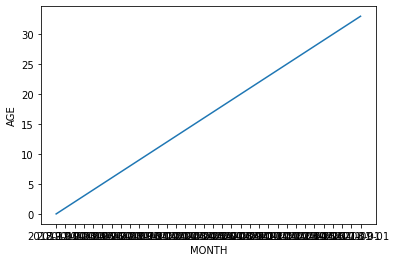

In [17]:
#checking feature that have unexpected evolution throught time
sns.lineplot(data=df_churned_test, x="MONTH", y="AGE")
#age is actually the number of monthly axtraction for a client. From first month to last month ob extrcation in database

<AxesSubplot:xlabel='MONTH', ylabel='AVG_SCORE'>

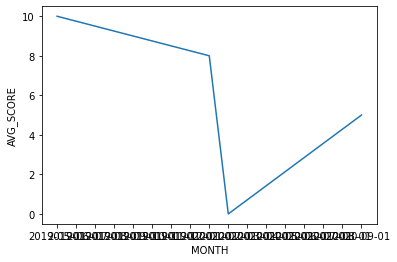

In [19]:
sns.lineplot(data=df_churned_test, x="MONTH", y="AVG_SCORE") 
#avg_score will not be used in the model, nps is a better feature to use accoridng to company (data science team)

<AxesSubplot:xlabel='MONTH', ylabel='AVERAGE_TIME_PER_USER'>

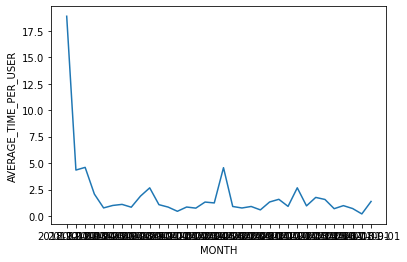

In [20]:
sns.lineplot(data=df_churned_test, x="MONTH", y="AVERAGE_TIME_PER_USER") 
#seems like time per use decrease with time for the particular client

In [21]:
#checking features that remain unchangeable through time for a non churn client

In [22]:
data_not_churned = data[data["CHURNING_DATE"].isna()] #observation that has no churning date 

In [23]:
data_not_churned.head()

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,NB_SMI_REQ,AMOUNT_SMI_REQ_EUR,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,ACCOUNTING_EXPORTS_GENERATED,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,AVG_SCORE,SUM_TICKETS,SUM_TICKETS_JIRA
0,viqa4cw1m8g0x3,2022-03-01,IT,2021-06-30,2022-03-01 16:50:43,NaN,False,True,Scale,Online,...,11.0,7722.11,1.0,83.00,NaN,9.0,NaN,NaN,1.0,NaN
1,vjoc1lr-0bupfj,2022-03-01,FR,2020-10-14,2021-12-31 09:06:06,NaN,False,NaN,Standard,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2,vm411wimib5e_x,2022-02-01,US,2021-12-16,2022-01-21 07:01:21,NaN,NaN,True,Standard,Online,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,vk9kmg_r0mf_0s,2022-02-01,MT,2020-10-12,2022-01-27 09:22:41,NaN,True,True,Essentials,Online + Expenses,...,NaN,NaN,0.0,0.00,0.0,46.0,22.0,NaN,NaN,NaN
4,vm3d8ydrpoed3e,2021-06-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,2.0,6447.27,26.0,825.09,NaN,1.0,10.0,NaN,2.0,NaN


In [24]:
data_not_churned.shape

(89297, 53)

In [26]:
df_not_churned_test = data_not_churned[data_not_churned["ENTITY_ID"] == "vm3d8ydrpoed3e"].sort_values(by='MONTH', ascending=True)
df_not_churned_test

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,NB_SMI_REQ,AMOUNT_SMI_REQ_EUR,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,ACCOUNTING_EXPORTS_GENERATED,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,AVG_SCORE,SUM_TICKETS,SUM_TICKETS_JIRA
645,vm3d8ydrpoed3e,2021-03-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
226,vm3d8ydrpoed3e,2021-04-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,2.0,15855.26,3.0,443.31,NaN,NaN,2.0,NaN,2.0,NaN
288,vm3d8ydrpoed3e,2021-05-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,4.0,10767.22,10.0,519.56,NaN,NaN,8.0,NaN,3.0,1.0
4,vm3d8ydrpoed3e,2021-06-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,2.0,6447.27,26.0,825.09,NaN,1.0,10.0,NaN,2.0,NaN
527,vm3d8ydrpoed3e,2021-07-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,2.0,226.99,9.0,178.51,NaN,2.0,10.0,NaN,NaN,NaN
781,vm3d8ydrpoed3e,2021-08-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,0.0,0.00,38.0,1966.22,NaN,1.0,11.0,NaN,NaN,NaN
747,vm3d8ydrpoed3e,2021-09-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,0.0,0.00,18.0,751.73,2.0,2.0,12.0,NaN,NaN,NaN
257,vm3d8ydrpoed3e,2021-10-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,0.0,0.00,23.0,921.27,0.0,3.0,12.0,NaN,NaN,NaN
17,vm3d8ydrpoed3e,2021-11-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,3.0,36724.18,30.0,661.41,0.0,7.0,12.0,NaN,NaN,NaN
348,vm3d8ydrpoed3e,2021-12-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,0.0,0.00,26.0,638.51,0.0,4.0,12.0,NaN,1.0,NaN


In [27]:
#features that does not vary throught time for a client who did not churn
one_occurence_not = pd.Series(df_not_churned_test.nunique() == 1).where(lambda x: x==True).dropna()
print(one_occurence_not)

ENTITY_ID           True
COUNTRY             True
FIRST_LOAD_DATE     True
LAST_LOAD_DATE      True
IS_FLAGSHIP         True
MAIN_ENTITY         True
PLAN                True
BUNDLE              True
INDUSTRY            True
CS_OWNER            True
HEALTHSCORE         True
FTE_AGG             True
AGG_INDUSTRY        True
HIGH_LOW_TOUCH      True
SEGMENT             True
SUB_SEGMENT         True
SUM_TICKETS_JIRA    True
dtype: object


In [28]:
#comparing constant features between a churned and a non churned client
print(one_occurence)

ENTITY_ID                  True
COUNTRY                    True
FIRST_LOAD_DATE            True
LAST_LOAD_DATE             True
CHURNING_DATE              True
BUNDLE                     True
INDUSTRY                   True
CS_OWNER                   True
HEALTHSCORE                True
NPS                        True
FTE_AGG                    True
AGG_INDUSTRY               True
HIGH_LOW_TOUCH             True
SEGMENT                    True
SUB_SEGMENT                True
NB_ACTIVE_PLASTIC_CARDS    True
NUMBER_OF_TEAMS_ACTIVE     True
dtype: object


<AxesSubplot:xlabel='MONTH', ylabel='AVERAGE_TIME_PER_USER'>

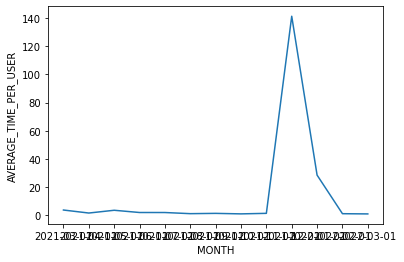

In [29]:
sns.lineplot(data=df_not_churned_test, x="MONTH", y="AVERAGE_TIME_PER_USER") 

<AxesSubplot:xlabel='MONTH', ylabel='HEALTHSCORE'>

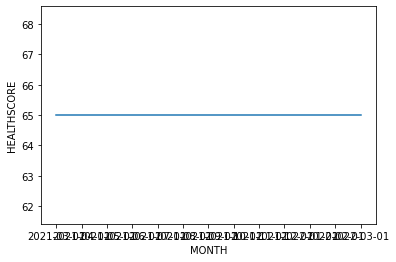

In [31]:
sns.lineplot(data=df_not_churned_test, x="MONTH", y="HEALTHSCORE")
#healthscore does not vary for this partocular client

In [32]:
#1 - need to check if target variable is clean: must have one unique churning date for each company that does churn
#2 - need to check age 
#3- check info of usage of fintech solution like : FIRST_LOAD_DATE , LAST_LOAD_DATE 

In [33]:
#firts let's create a database where one row is a unique client 
data_per_client = data.groupby(['ENTITY_ID'])

In [34]:
data_per_client.head()

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,NB_SMI_REQ,AMOUNT_SMI_REQ_EUR,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,ACCOUNTING_EXPORTS_GENERATED,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,AVG_SCORE,SUM_TICKETS,SUM_TICKETS_JIRA
0,viqa4cw1m8g0x3,2022-03-01,IT,2021-06-30,2022-03-01 16:50:43,NaN,False,True,Scale,Online,...,11.0,7722.11,1.0,83.00,NaN,9.0,NaN,NaN,1.0,NaN
1,vjoc1lr-0bupfj,2022-03-01,FR,2020-10-14,2021-12-31 09:06:06,NaN,False,NaN,Standard,Online + Expenses,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2,vm411wimib5e_x,2022-02-01,US,2021-12-16,2022-01-21 07:01:21,NaN,NaN,True,Standard,Online,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,vk9kmg_r0mf_0s,2022-02-01,MT,2020-10-12,2022-01-27 09:22:41,NaN,True,True,Essentials,Online + Expenses,...,NaN,NaN,0.0,0.00,0.0,46.0,22.0,NaN,NaN,NaN
4,vm3d8ydrpoed3e,2021-06-01,DE,2021-03-12,2022-03-08 18:56:17,NaN,False,True,Standard,Suite,...,2.0,6447.27,26.0,825.09,NaN,1.0,10.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109742,e8vb8akqeg7g2b,2021-12-01,FR,2021-12-10,2022-02-17 09:20:39,NaN,False,True,Starter,Online,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
109763,eqe1goaa3zbf8j,2021-11-01,DE,2021-07-06,2022-02-08 09:29:05,NaN,False,True,Standard,Suite,...,1.0,4474.40,36.0,944.10,NaN,8.0,13.0,NaN,5.0,NaN
109783,epdp2iwv91jix_,2022-02-01,FR,2022-01-04,2022-01-21 09:24:18,NaN,False,True,Essentials,Online,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,7.0,1.0,NaN
109820,eqe1goaa3zbf8j,2021-07-01,DE,2021-07-06,2022-02-08 09:29:05,NaN,False,True,Standard,Suite,...,3.0,9358.14,8.0,475.04,NaN,6.0,11.0,NaN,6.0,NaN


In [35]:
grouped_client_age = data.groupby(['ENTITY_ID']).agg({'AGE': ['mean', 'min', 'max']})
grouped_client_age.head(10)

AGE        
               mean min max
ENTITY_ID                  
--p-12dr9z7wv-  4.5   0   9
-0iw08wtqdeoih  7.0   0  14
-0xk7l03drp_-a  0.0   0   0
-1p9n4fyn7xken  5.0   0  10
-1sv6xt88a1ivw  1.0   0   2
-24s-7m1ykqhkv  0.5   0   1
-29j_ewxfo5ss3  5.5   0  11
-2hjn5te_t_6h8  4.0   0   8
-2jbu0hpvem5-9  2.5   0   5
-2y1hd-foxarkq  1.5   0   3

In [36]:
grouped_client_nps = data.groupby(['ENTITY_ID']).agg({'NPS': ['mean', 'min', 'max']})
grouped_client_nps.head(20)

NPS              
                 mean    min    max
ENTITY_ID                          
--p-12dr9z7wv-  100.0  100.0  100.0
-0iw08wtqdeoih    NaN    NaN    NaN
-0xk7l03drp_-a    NaN    NaN    NaN
-1p9n4fyn7xken    NaN    NaN    NaN
-1sv6xt88a1ivw    NaN    NaN    NaN
-24s-7m1ykqhkv -100.0 -100.0 -100.0
-29j_ewxfo5ss3    NaN    NaN    NaN
-2hjn5te_t_6h8    NaN    NaN    NaN
-2jbu0hpvem5-9    NaN    NaN    NaN
-2y1hd-foxarkq    NaN    NaN    NaN
-3RqdD627p       41.0   41.0   41.0
-3jf2w1ggsecyc    0.0    0.0    0.0
-3ju1-cjnw9ds_    NaN    NaN    NaN
-3ucpo-e--apme    NaN    NaN    NaN
-4mXxn-Xoa        NaN    NaN    NaN
-4w85bqfdh2t_f   50.0   50.0   50.0
-59ff5dnhs0a1o    NaN    NaN    NaN
-63ik4skggs56n  -25.0  -25.0  -25.0
-6bi4tmxpt27qv -100.0 -100.0 -100.0
-6hrar9q_94sqr    NaN    NaN    NaN

In [37]:
grouped_client_hs = data.groupby(['ENTITY_ID']).agg({'HEALTHSCORE': ['mean', 'min', 'max']})
grouped_client_hs.head(20)

HEALTHSCORE            
                      mean   min   max
ENTITY_ID                             
--p-12dr9z7wv-         NaN   NaN   NaN
-0iw08wtqdeoih        65.0  65.0  65.0
-0xk7l03drp_-a         NaN   NaN   NaN
-1p9n4fyn7xken        65.0  65.0  65.0
-1sv6xt88a1ivw        65.0  65.0  65.0
-24s-7m1ykqhkv         NaN   NaN   NaN
-29j_ewxfo5ss3        25.0  25.0  25.0
-2hjn5te_t_6h8        65.0  65.0  65.0
-2jbu0hpvem5-9        65.0  65.0  65.0
-2y1hd-foxarkq        65.0  65.0  65.0
-3RqdD627p            65.0  65.0  65.0
-3jf2w1ggsecyc        65.0  65.0  65.0
-3ju1-cjnw9ds_        65.0  65.0  65.0
-3ucpo-e--apme        65.0  65.0  65.0
-4mXxn-Xoa            25.0  25.0  25.0
-4w85bqfdh2t_f        65.0  65.0  65.0
-59ff5dnhs0a1o        65.0  65.0  65.0
-63ik4skggs56n        65.0  65.0  65.0
-6bi4tmxpt27qv        65.0  65.0  65.0
-6hrar9q_94sqr        90.0  90.0  90.0

In [39]:
#number of unique clients per country 
n_by_country = data.groupby("COUNTRY")["ENTITY_ID"].count()
print(n_by_country)
#some countires have very few clients, those contries can be considered as outliers when it comes to running machine learning models

COUNTRY
AT      793
AU       40
BE     4667
BG      218
BL       13
CH      162
CY      148
CZ      144
DE    16375
DK      356
DM       34
EE      269
ES     2918
FI      334
FR    60336
GB    12365
GI       12
GP       16
GR      164
HR       53
HU       70
IE     1031
IS       15
IT      815
JP       21
LI       23
LT       82
LU      628
LV       38
MQ       99
MT      311
NL     1650
NO      226
PL      257
PT      723
RE        9
RO      123
SE      308
SG      125
SI        4
SK       16
US     3910
YT       11
Name: ENTITY_ID, dtype: int64


In [40]:
## analysing features by group 

In [41]:
usage_features = ['NON_REQUESTER_LOGIN_PER_USER','REQUESTER_LOGIN_PER_USER', 'LOGIN_PER_USER','AVERAGE_TIME_PER_USER_NON_REQUESTER',
                  'AVERAGE_TIME_PER_USER_REQUESTER','AVERAGE_TIME_PER_USER', 'ACTIVE_USERS_PER_USERS', 'ACTIVE_USERS_PER_FTE', 
                  'USERS_PER_FTE',  'NUMBER_OF_TEAMS_ACTIVE', 'SUM_TICKETS', 'SUM_TICKETS_JIRA', 'NUMBER_EXPORT', 'ACCOUNTING_EXPORTS_GENERATED']
revenue_features = ['VAR_MRR_PER_FTE','VAR_MRR', 'FIX_MRR']
payment_features = ['NB_ACTIVE_PLASTIC_CARDS', 'AMOUNT_PAY_PER_ACTIVE_USERS', 'COUNT_PAY_PER_ACTIVE_USERS', 'PAY_PER_LOAD', 'AMOUNT_PLASTIC_CARD_PAYMENTS_EUR', 
                  'NB_SINGLE_PURCHASE_PAYMENTS', 'AMOUNT_SINGLE_PURCHASE_PAYMENTS_EUR', 'NB_SUBSCRIPTIONS_PAYMENTS','AMOUNT_SUBSCRIPTIONS_PAYMENTS_EUR',
                  'NB_SMI_REQ', 'AMOUNT_SMI_REQ_EUR', 'NB_EXP_CL_REQ', 'AMOUNT_EXP_CL_REQ_EUR', 'NB_PLASTIC_CARD_PAYMENTS']
other_features = [item for item in features if item not in usage_features + revenue_features + payment_features]

In [42]:
len(other_features)+ len(usage_features) + len(revenue_features) + len(payment_features)

53

In [43]:
df_not_churned_test[revenue_features]

,VAR_MRR_PER_FTE,VAR_MRR,FIX_MRR
645,0.078370,7.21,399.0
226,0.427065,39.29,399.0
288,0.725761,66.77,399.0
4,1.188261,109.32,399.0
527,1.535652,141.28,329.0
781,1.545543,142.19,329.0
747,1.858152,170.95,329.0
257,1.180543,108.61,329.0
17,2.661739,244.88,329.0
348,2.179239,200.49,329.0


In [44]:
data_churned = data[data["CHURNING_DATE"].notnull()] #observation that has churned

In [45]:
data_churned.head()

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,NB_SMI_REQ,AMOUNT_SMI_REQ_EUR,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,ACCOUNTING_EXPORTS_GENERATED,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,AVG_SCORE,SUM_TICKETS,SUM_TICKETS_JIRA
7,vlOl4DxrAa,2020-05-01,FR,2019-11-06,2019-11-06 12:10:54,2020-09-04 09:40:40,True,NaN,NaN,not migrated yet,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,1.0
8,vlvFGKKIrys,2020-02-01,DE,2018-09-04,2021-01-12 13:35:23,2021-01-31 17:14:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,16.0,2.0,6.0,NaN,NaN,NaN
14,vpZbO5MRMvo,2019-11-01,FR,2018-12-18,2019-08-16 13:54:53,2019-12-02 14:01:57,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN
21,vlvFGKKIrys,2019-06-01,DE,2018-09-04,2021-01-12 13:35:23,2021-01-31 17:14:09,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,NaN,NaN,16.0,5.0,6.0,NaN,2.0,NaN
22,voa7q656-4ajwh,2021-12-01,DE,2021-10-06,2021-10-06 16:57:46,2021-12-13 12:16:58,NaN,NaN,NaN,Online + Expenses,...,NaN,NaN,3.0,148.04,NaN,NaN,2.0,NaN,NaN,NaN


In [46]:
data_churned.shape

(20615, 53)

In [48]:
#analysing churning date feature is clean: check if it's unique in case it does exist

def clean_date(df, X):
    nb = df.groupby("ENTITY_ID")[X].nunique()
    r = nb[nb != 1] #entity_id with more than one churning_date
    return r 

print(len(clean_date(data_churned, "CHURNING_DATE"))) #churning date is unique for each client if he did churn. good news !

0


In [49]:
#analysing first_load is clean: check if it's unique in case it does exist
print(len(clean_date(data, "FIRST_LOAD_DATE"))) #every client has a unique FIRST_LOAD_DATE

0


In [51]:
#analysing last_load is clean: check if last_load_date missing
no_last_load = data[data["LAST_LOAD_DATE"].isna()]
len(no_last_load) 
#there are missing values (3% of total rows)

3147

In [52]:
# we will consider for now the following features as constant ones (ie no evolution over time )
#after comparing the features that dont vary for a random churning client and randomo not churning client
constant_features = ["ENTITY_ID", "COUNTRY", "FIRST_LOAD_DATE", "LAST_LOAD_DATE", "MAIN_ENTITY", "INDUSTRY", "CS_OWNER", "HEALTHSCORE", "FTE_AGG", "GG_INDUSTRY", "HIGH_LOW_TOUCH", "SEGMENT", "SUB_SEGMENT"]

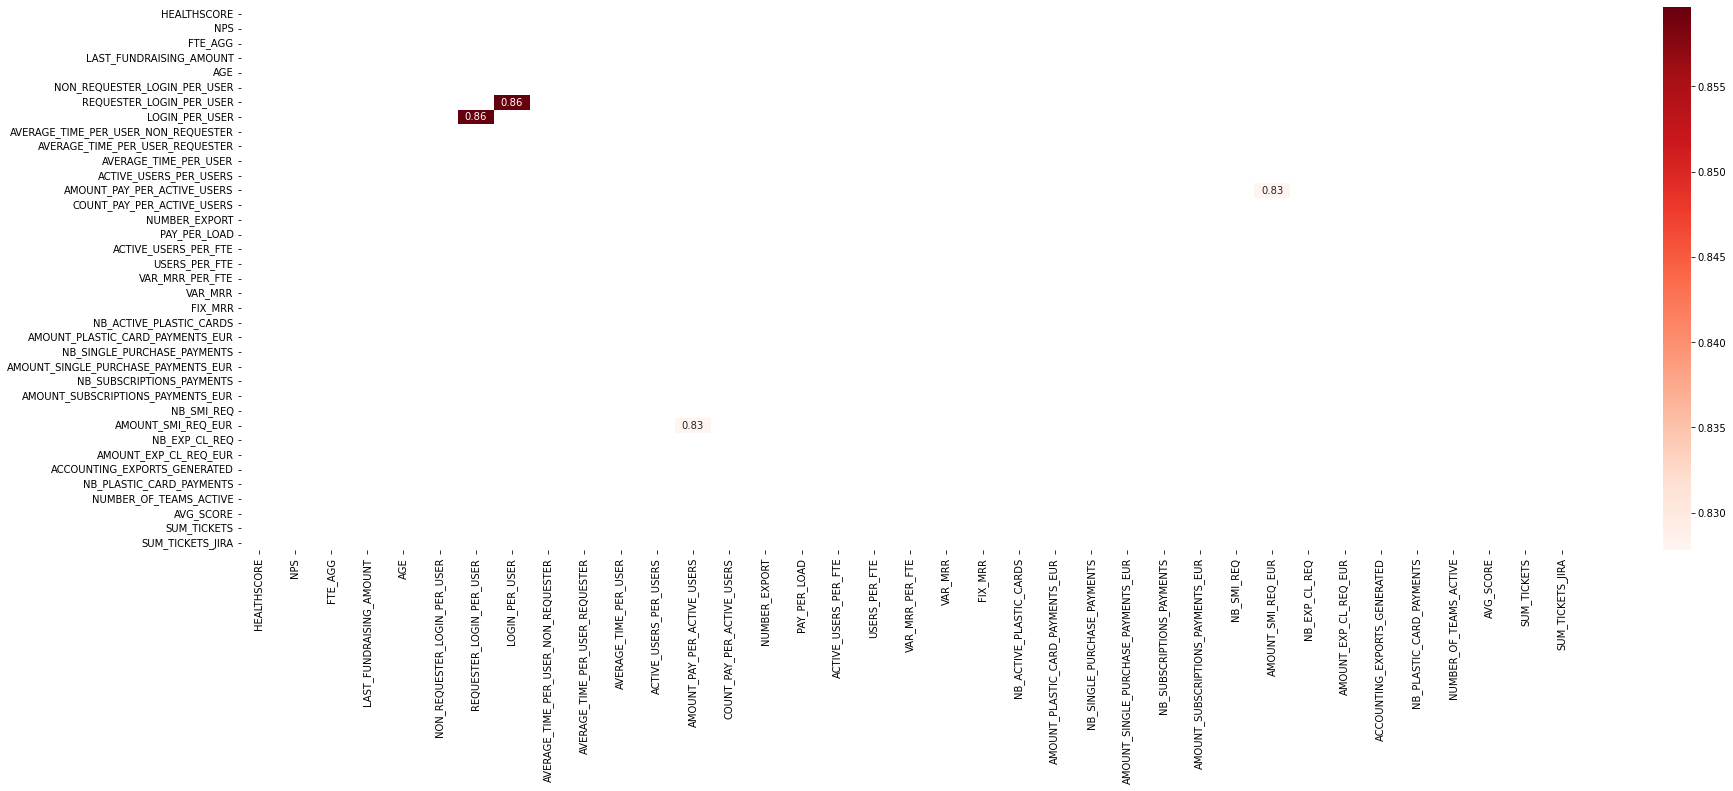

In [54]:
#checking correlation between features as I noticed that many features have almost the same signification according to their names

dfCorr = data.corr()
dfCorr
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [55]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound))] # & (xCorr !=1.000)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [56]:
corrFilter(data[usage_features], .8) #checking correlation > 80%

REQUESTER_LOGIN_PER_USER      LOGIN_PER_USER                  0.859661
NON_REQUESTER_LOGIN_PER_USER  NON_REQUESTER_LOGIN_PER_USER    1.000000
                              REQUESTER_LOGIN_PER_USER             NaN
dtype: float64

In [57]:
corrFilter(data[revenue_features], .8)

VAR_MRR_PER_FTE  VAR_MRR_PER_FTE    1.0
                 VAR_MRR            NaN
dtype: float64

In [58]:
corrFilter(data[payment_features], .8)

AMOUNT_PAY_PER_ACTIVE_USERS  AMOUNT_SMI_REQ_EUR             0.827788
NB_ACTIVE_PLASTIC_CARDS      NB_ACTIVE_PLASTIC_CARDS        1.000000
                             AMOUNT_PAY_PER_ACTIVE_USERS         NaN
dtype: float64

In [59]:
corrFilter(data[other_features], .8)

HEALTHSCORE  HEALTHSCORE    1.0
             NPS            NaN
dtype: float64

In [60]:
#features to delete as not relevant for now or corraleated with another feature
unrelevent_features = ["AVG_SCORE", "SEGMENT", "SUB_SEGMENT", "CS_OWNER", "LAST_FUNDRAISING_AMOUNT", #not relevant
                       "ACCOUNTING_EXPORTS_GENERATED", "AMOUNT_SMI_REQ_EUR"] #correlated to other varibales

In [61]:
#features to keep
features_to_keep = [item for item in features if item not in unrelevent_features]
len(features_to_keep)

46

In [62]:
#deleting non relevant fetaures
df = pd.DataFrame(data, columns = features_to_keep)
df.shape

(109912, 46)

In [63]:
#creating target variable 1 if churning_date non missing 0 otherwise
df['CHURNING_DATE'] = df['CHURNING_DATE'].fillna(0)
df['CHURNING_DATE'] = df['CHURNING_DATE'].where(df['CHURNING_DATE'] == 0, 1)

In [64]:
df.head(10)

,ENTITY_ID,MONTH,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,...,AMOUNT_SINGLE_PURCHASE_PAYMENTS_EUR,NB_SUBSCRIPTIONS_PAYMENTS,AMOUNT_SUBSCRIPTIONS_PAYMENTS_EUR,NB_SMI_REQ,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,SUM_TICKETS,SUM_TICKETS_JIRA
0,viqa4cw1m8g0x3,2022-03-01,IT,2021-06-30,2022-03-01 16:50:43,0,False,True,Scale,Online,...,203.6300,24.0,3767.9700,11.0,1.0,83.00,9.0,NaN,1.0,NaN
1,vjoc1lr-0bupfj,2022-03-01,FR,2020-10-14,2021-12-31 09:06:06,0,False,NaN,Standard,Online + Expenses,...,0.0000,0.0,0.0000,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2,vm411wimib5e_x,2022-02-01,US,2021-12-16,2022-01-21 07:01:21,0,NaN,True,Standard,Online,...,598.9986,11.0,145.7012,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,vk9kmg_r0mf_0s,2022-02-01,MT,2020-10-12,2022-01-27 09:22:41,0,True,True,Essentials,Online + Expenses,...,3758.2700,70.0,23921.8800,NaN,0.0,0.00,46.0,22.0,NaN,NaN
4,vm3d8ydrpoed3e,2021-06-01,DE,2021-03-12,2022-03-08 18:56:17,0,False,True,Standard,Suite,...,2150.9900,2.0,41.3500,2.0,26.0,825.09,1.0,10.0,2.0,NaN
5,viZcQDXwg,2021-10-01,FR,2019-12-11,2021-12-22 10:57:50,0,False,True,Essentials,Suite,...,18213.1200,75.0,44668.6800,42.0,63.0,8267.41,50.0,11.0,1.0,NaN
6,vmVDcVaQuG,2020-11-01,IE,2019-12-05,2022-03-07 09:26:14,0,False,True,Lite,Online + Expenses,...,7508.3100,14.0,2118.2000,NaN,4.0,230.14,10.0,4.0,NaN,NaN
7,vlOl4DxrAa,2020-05-01,FR,2019-11-06,2019-11-06 12:10:54,1,True,NaN,NaN,not migrated yet,...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0
8,vlvFGKKIrys,2020-02-01,DE,2018-09-04,2021-01-12 13:35:23,1,NaN,NaN,NaN,Online + Expenses,...,4851.5800,70.0,6350.2200,NaN,NaN,NaN,2.0,6.0,NaN,NaN
9,vmVDcVaQuG,2020-04-01,IE,2019-12-05,2022-03-07 09:26:14,0,False,True,Lite,Online + Expenses,...,13873.3300,10.0,628.7300,NaN,4.0,239.00,2.0,4.0,NaN,NaN


In [65]:
grouper = df.groupby('MONTH')
grouper.first()

,ENTITY_ID,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,INDUSTRY,...,AMOUNT_SINGLE_PURCHASE_PAYMENTS_EUR,NB_SUBSCRIPTIONS_PAYMENTS,AMOUNT_SUBSCRIPTIONS_PAYMENTS_EUR,NB_SMI_REQ,NB_EXP_CL_REQ,AMOUNT_EXP_CL_REQ_EUR,NB_PLASTIC_CARD_PAYMENTS,NUMBER_OF_TEAMS_ACTIVE,SUM_TICKETS,SUM_TICKETS_JIRA
MONTH,,,,,,,,,,,,,,,,,,,,,
2016-01-01,E1jzxtOde,FR,2016-01-25,2022-02-21 16:55:59,0,False,None,Standard,Online + Expenses,Internet,...,542.2800,3.0,112.8800,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2016-02-01,E1liZLpYe,FR,2016-02-09,2021-11-08 18:51:20,0,False,True,Standard,Suite,Computer Software,...,20141.2100,2.0,71.7000,NaN,NaN,NaN,NaN,4.0,1.0,NaN
2016-03-01,E1jzxtOde,FR,2016-01-25,2022-02-21 16:55:59,0,False,True,Standard,Online + Expenses,Internet,...,3862.7400,24.0,1412.2700,NaN,NaN,NaN,NaN,6.0,2.0,NaN
2016-04-01,4yCvvmT6e,FR,2016-04-01,2019-04-29 19:14:02,1,False,True,Lite,Online,Computer Software,...,299.1100,2.0,-2.2500,NaN,NaN,NaN,NaN,8.0,1.0,NaN
2016-05-01,4ycir1kz-,FR,2016-05-31,2019-04-29 19:14:02,1,True,True,Lite,Online,Entertainment,...,7.7000,0.0,0.0000,NaN,NaN,NaN,1.0,2.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,vm3d8ydrpoed3e,DE,2021-03-12,2022-03-08 18:56:17,0,False,True,Standard,Suite,Online Media,...,3770.2500,10.0,1690.4800,3.0,30.0,661.41,7.0,12.0,5.0,2.0
2021-12-01,vv2cm9rmp-o703,FR,2021-04-30,2022-03-03 11:22:03,0,True,True,Scale,Online + Expenses,Human Resources,...,945.5500,41.0,15339.7200,77.0,3.0,148.04,18.0,2.0,8.0,2.0
2022-01-01,vy7e3h6kh11q4x,DE,2021-01-26,2021-10-29 18:50:52,0,False,True,Lite,Online + Expenses,"Leisure, Travel & Tourism",...,0.0000,3.0,160.7000,260.0,0.0,0.00,0.0,0.0,3.0,2.0


In [66]:
#list of months of observations
months = df["MONTH"].unique()

In [67]:
#we chose to remove rows with missing last_load_date as it must be a error for every client has a 1rst load date and should hence have a last loading date.
df = df[df['LAST_LOAD_DATE'].notna()]

In [69]:
constant_features = ['ENTITY_ID', 'COUNTRY', 'FIRST_LOAD_DATE', 'LAST_LOAD_DATE', 'CHURNING_DATE', 
                     'IS_FLAGSHIP', 'MAIN_ENTITY', 'PLAN', 'BUNDLE', 'INDUSTRY', 'HEALTHSCORE','NPS',
                     'FTE_AGG', 'AGG_INDUSTRY','HIGH_LOW_TOUCH', 'AGE']

In [70]:
#create a dataset with unique clients id and constant features 
df_client = pd.DataFrame(df, columns = constant_features).drop_duplicates(subset=['ENTITY_ID'], keep="last")

In [71]:
df_client.head()

,ENTITY_ID,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,INDUSTRY,HEALTHSCORE,NPS,FTE_AGG,AGG_INDUSTRY,HIGH_LOW_TOUCH,AGE
363,vn4bq3454co39-,US,2022-02-03,2022-03-02 07:00:06,0,True,NaN,Scale,Online,NaN,NaN,59.0,97,Others,High,1
560,vnbfwqfkhdkbfs,FR,2021-11-05,2022-03-03 09:26:05,0,True,NaN,Lite,Online,NaN,65.0,33.0,7,Others,High,2
569,vko_xz5ucakr6t,FR,2022-02-11,2022-03-02 18:56:32,0,False,NaN,Lite,Online + Expenses,NaN,NaN,NaN,8,Others,Low,1
600,vm411wimib5e_x,US,2021-12-16,2022-01-21 07:01:21,0,NaN,True,Standard,Online,NaN,90.0,NaN,439,Others,High,0
693,vsxedg3yzscpbj,FR,2021-11-05,2022-03-07 09:22:33,0,False,NaN,Essentials,Online,NaN,90.0,100.0,9,Others,High,2


In [72]:
#transforming dates features into datetime format
df_client['FIRST_LOAD_DATE'] = pd.to_datetime(df_client['FIRST_LOAD_DATE'], format='%Y-%m-%d')
df_client['LAST_LOAD_DATE'] = pd.to_datetime(df_client['LAST_LOAD_DATE'], format='%Y-%m-%d %H:%M:%S')

In [74]:
#creating variable Tenure wich indicates how long the client have loaded his portfolio
df_client["TENURE"] = (df_client["LAST_LOAD_DATE"] - df_client["FIRST_LOAD_DATE"]).dt.days

In [75]:
df_client.head()

,ENTITY_ID,COUNTRY,FIRST_LOAD_DATE,LAST_LOAD_DATE,CHURNING_DATE,IS_FLAGSHIP,MAIN_ENTITY,PLAN,BUNDLE,INDUSTRY,HEALTHSCORE,NPS,FTE_AGG,AGG_INDUSTRY,HIGH_LOW_TOUCH,AGE,TENURE
363,vn4bq3454co39-,US,2022-02-03,2022-03-02 07:00:06,0,True,NaN,Scale,Online,NaN,NaN,59.0,97,Others,High,1,27
560,vnbfwqfkhdkbfs,FR,2021-11-05,2022-03-03 09:26:05,0,True,NaN,Lite,Online,NaN,65.0,33.0,7,Others,High,2,118
569,vko_xz5ucakr6t,FR,2022-02-11,2022-03-02 18:56:32,0,False,NaN,Lite,Online + Expenses,NaN,NaN,NaN,8,Others,Low,1,19
600,vm411wimib5e_x,US,2021-12-16,2022-01-21 07:01:21,0,NaN,True,Standard,Online,NaN,90.0,NaN,439,Others,High,0,36
693,vsxedg3yzscpbj,FR,2021-11-05,2022-03-07 09:22:33,0,False,NaN,Essentials,Online,NaN,90.0,100.0,9,Others,High,2,122
